# Machine Learning #1 : 분류 문제 - Logistic 회귀

## data/ library import

In [135]:
import warnings

In [136]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

data= pd.read_csv('breast-cancer-wisconsin.csv')


## data 확인

In [4]:
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,683.0,1.076720e+06,620644.047655,63375.0,877617.0,1171795.0,1238705.0,13454352.0
Clump_Thickness,683.0,4.442167e+00,2.820761,1.0,2.0,4.0,6.0,10.0
Cell_Size,683.0,3.150805e+00,3.065145,1.0,1.0,1.0,5.0,10.0
Cell_Shape,683.0,3.215227e+00,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,683.0,2.830161e+00,2.864562,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,683.0,3.234261e+00,2.223085,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,683.0,3.445095e+00,2.449697,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,683.0,2.869693e+00,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221e+00,1.732674,1.0,1.0,1.0,1.0,10.0


In [11]:
data.columns.tolist()

['code',
 'Clump_Thickness',
 'Cell_Size',
 'Cell_Shape',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses',
 'Class']

In [32]:
l=data.columns.tolist()[1:10]
l


['Clump_Thickness',
 'Cell_Size',
 'Cell_Shape',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [9]:
data.shape

(683, 11)

### 유방암 환자 비율 확인

In [8]:
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

## 특성치(설명변수)와 레이블(종속변수) 나누기

### 특성치 (설명변수) 분류하기

### 방법1 : 변수명으로 분리하기 (=column 명)

In [36]:
X1=data[[ 'Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
X1

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [37]:
X1_1=data[data.columns.tolist()[1:10]]
X1_1


,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


### 방법2 : Column indexing

In [38]:
X2=data[data.columns[1:10]]
X2

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


### 방법3: loc method 이용

- 유의사항 : 인덱싱 차이 유의 - 마지막 범위까지 포함
- EX) 1:10 => 1열부터 10열까지

In [40]:
X3=data.loc[:,"Clump_Thickness":"Mitoses"]
X3

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


#### iloc 사용해도 결과는 동일

In [41]:
data.iloc[:,1:10]

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1



### 레이블(종속변수) 분류하기

In [42]:
y=data[['Class']]
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
678,0
679,0
680,1
681,1


## train/ test set 나누기

-주요 파라미터
1. stratify (층화) : 범주 비율에 맞게 추출
2. random_state=42 : 난수 규칙, (같은 결과 확인)
3. test_size=0.25 (기본값) : test set 비율
4. shuffle (기본값 : True) : shuffle 여부

### sklearn import

In [44]:
from sklearn.model_selection import train_test_split

### data 분할하기

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,stratify=y,random_state=42)

### train/ test set 비율

In [52]:
len(X_test)/(len(X_test)+len(X_train))

0.25036603221083453

In [46]:
y_train.mean()

Class    0.349609
dtype: float64

In [55]:
y_test.var()

Class    0.229102
dtype: float64

In [47]:
y_test.mean()

Class    0.350877
dtype: float64

In [54]:
y_train.var()

Class    0.227828
dtype: float64

## data set 정규화 (Min-Man, 표준화)

<b> ※ train set에 fitting 한 후 test set도 정규화 할 것 </b>
- 순서 :  .fit -> .transform

### 라이브러리 Import

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# 정규화 하기 위한 Class 선언

scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

### 정규화 1: Min-Max 정규화 : numpy array로 반환

In [68]:
# X_train set에 fit (train 셋의 최대 최소를 기준으로 0~1사이 값으로 변환)
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
# test set은 별도의 fit 과정 필요 없음 (X_train set에 맞춰 fitting 되어있음)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

### 정규화 2 : 표준화 (정규분포에 fitting) :numpy array로 반환

In [79]:
# X_train set에 fit (train 셋을 정규 분포에 근사)
scaler_standard.fit(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)
# test set은 별도의 fit 과정 필요 없음 (X_train set에 맞춰 fitting 되어있음)
X_scaled_standard_test=scaler_standard.transform(X_test)

### 정규화 결과 확인하기

In [75]:
# min-max 정규화 - train set
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# 표준화 - train set
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [78]:
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


## 모델 학습

### sklearn 라이브러리 import

In [81]:
from sklearn.linear_model import LogisticRegression
# Class 선언
model=LogisticRegression()

### 모델 학습 (train set 이용하기)

In [82]:
model.fit(X_scaled_minmax_train,y_train) #모델에 학습

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

### train set의 예측치/정확도 구하기

- 예측치 : model.predict
- 정확도(Accuarcy) : model.score(x_train, y_train)

In [89]:
pred_train=model.predict(X_scaled_minmax_train)
print( "Logistic 회귀 모델의 정확도 : " ,model.score(X_scaled_minmax_train,y_train))

Logistic 회귀 모델의 정확도 :  0.97265625


#### 모델의 예측 확률

In [91]:
model.predict_proba(X_scaled_minmax_train)

array([[0.98101387, 0.01898613],
       [0.7681914 , 0.2318086 ],
       [0.96643115, 0.03356885],
       ...,
       [0.11344041, 0.88655959],
       [0.98740488, 0.01259512],
       [0.99046984, 0.00953016]])

#### 회귀 모델의 상수 : coef_

In [96]:
model.coef_.tolist()[0]

[2.5375183632972074,
 1.7450083798212197,
 1.9517785814607636,
 1.381752935362637,
 1.1194519302008699,
 3.2896703792679056,
 1.403280974947181,
 1.2145170680225785,
 1.1424321977229857]

#### 회귀 모델의 y절편 : intercept_

In [87]:
model.intercept_

array([-4.92402106])

### 변수별 상수 구하기

In [150]:
dict_coef={var:coef for var,coef in zip(data.columns.tolist()[1:10],model.coef_.tolist()[0])}
dict_coef
for k,v in dict_coef.items():
    print("변수명:",k, "  / 계수:",v)

변수명: Clump_Thickness   / 계수: 2.5375183632972074
변수명: Cell_Size   / 계수: 1.7450083798212197
변수명: Cell_Shape   / 계수: 1.9517785814607636
변수명: Marginal_Adhesion   / 계수: 1.381752935362637
변수명: Single_Epithelial_Cell_Size   / 계수: 1.1194519302008699
변수명: Bare_Nuclei   / 계수: 3.2896703792679056
변수명: Bland_Chromatin   / 계수: 1.403280974947181
변수명: Normal_Nucleoli   / 계수: 1.2145170680225785
변수명: Mitoses   / 계수: 1.1424321977229857


### test set의 예측치/ 정확도 확인하기

- fitting 과정 필요 없음

In [92]:
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,y_test)

0.9590643274853801

## 결과 확인하기 : confusion matrix

## 이미지 출처 : 나무 위키

<img src="https://w.namu.la/s/e8e4a30faead7fdb08c2612e603ee41f80a59a6c7e84dfa8fc78ea94c8663e3da580c5ee84f945b05f3e1cd840bad93e443fa6de74db7bd3fe0833dedc30ad815b327429c552555b6789e23d540dbb12b055ef48c65769c3d1ded6147bd9c485">

1. 정확도 (Accuracy) : 예측이 정확할 확률 (참긍정+참부정)/(전체 예측)

2. 정밀도 (Precision) : 예측이 긍정일 때 실제로 긍정일 확률 (참긍정)/(참긍정+거짓긍정)

3. 민감도(=재현율)/ Sensitivity(=Recall) : 실제로 긍정일 때 예측도 긍정일 확률 (참금정)/ (참긍정+거짓부정)

4. 특이도(Specificity) : 실제로 부정일 때 예측도 부정일 확률 (참 부정)/(참부정 + 거짓긍정)

5. F1 : 정밀도와 민감도의 조화평균 <br>
<b> -> 정밀도와 재현율 중 하나가 높아지면 다른 하나가 낮아지는 상황을 고려하여 보정하기 위해 활용 </b>



## 혼동행렬 출력하기

### train set

In [107]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train,pred_train)
print(confusion_train)


[[328   5]
 [  9 170]]


### test set

In [109]:
confusion_train=confusion_matrix(y_test,pred_test)
print(confusion_train)

[[106   5]
 [  2  58]]


## 평가지표 확인하기 : report 출력하기

### train set

In [112]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train,pred_train)
print(cfreport_train)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



### test set

In [114]:
cfreport_test=classification_report(y_test,pred_test)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## ROC Curve 확인하기

- 참고자료 출처 : https://angeloyeo.github.io/2020/08/05/ROC.html

<img src="https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic1.png">

### library import

In [115]:
from sklearn.metrics import roc_curve, auc

In [116]:
from sklearn import metrics

### AUC 구하기

In [117]:
false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test,model.decision_function(X_scaled_minmax_test))
roc_auc=metrics.roc_auc_score(y_test,model.decision_function(X_scaled_minmax_test))


0.9923423423423423

In [118]:
roc_auc

0.9923423423423423

- 결정함수 : 부호를 통해 값 확인 가능

In [120]:
model.decision_function(X_scaled_minmax_test)[1:4]

array([-3.5070115 , -2.81670291, -3.8601789 ])

### ROC Curve 그리기

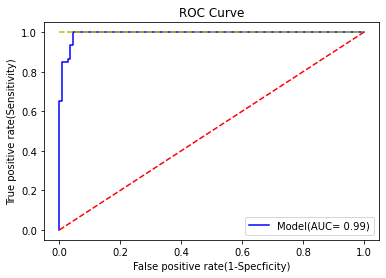

In [126]:
import matplotlib.pyplot as plt
# title 입력
plt.title("ROC Curve")
# x축 
plt.xlabel("False positive rate(1-Specficity)")
# y축
plt.ylabel("True positive rate(Sensitivity)")
# roc curve 그리기
# 색상 지정 : "b"
plt.plot(false_positive_rate,true_positive_rate,"b",label="Model(AUC= %0.2f)"%roc_auc)
# 기준선 그리기
# 선타입/마커 지정
plt.plot([0,1],[1,1],"y--") # (0,1) /(1,1) 지나는 직선, 색상은 yellow
plt.plot([0,1],[0,1],"r--")
plt.legend(loc="lower right")
plt.show()

### 참고자료 : matplotlib 선/마커 지정하기

- 출처 : https://wikidocs.net/92083#_2

선/마커 표시 형식 예시

<img src="https://wikidocs.net/images/page/92083/set_marker_04.png">

선/마커 동시 지정하기

<img src="https://wikidocs.net/images/page/92083/set_marker_12.png">

설정 방법

<img src="https://wikidocs.net/images/page/92083/set_marker_05.png">

## 예측 결과 정리

### train set 예측확률 Dataframe에 저장하기

In [137]:
prob_train=model.predict_proba(X_scaled_minmax_train) # 0,1에 대한 각각의 확률 예측값


y_train[['y_pred']]=pred_train #trainset에 의한 예측 결과 저장

y_train[['y_prob0','y_prob1']]=prob_train
y_train

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [132]:
pd.DataFrame(prob_train)

,0,1
0,0.981014,0.018986
1,0.768191,0.231809
2,0.966431,0.033569
3,0.988880,0.011120
4,0.203161,0.796839
...,...,...
507,0.021270,0.978730
508,0.895961,0.104039
509,0.113440,0.886560
510,0.987405,0.012595


### test set 예측확률 Dataframe에 저장하기

In [138]:
prob_test=model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']]=pred_test
y_test[['y_prob0','y_prob1']]=prob_test
y_test

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


## 전체 결과 Dataframe으로 병합 후 csv 파일로 저장하기

In [139]:
X_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
541,5,2,2,2,1,1,2,1,1
549,4,1,1,1,2,1,3,2,1
318,5,2,2,2,2,1,2,2,1
183,1,2,3,1,2,1,3,1,1
478,5,10,10,10,6,10,6,5,2
...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1
314,8,10,3,2,6,4,3,10,1
15,7,4,6,4,6,1,4,3,1
510,3,1,1,2,2,1,1,1,1


In [140]:
y_test

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [147]:
# pd.concat : dataframe 합치기
# axis=0 (기본값) : 열을 추가 (세로 병합)
# axis=1 : 변수를 합침 (가로 병합)
# Total_test=pd.concat([X_test,y_test],axis-1) 
Total_test=pd.concat([X_test,y_test], axis=1) 
# csv로 내보내기
Total_test.to_csv("classification_logistic.csv")


In [149]:
Total_test.head(20)

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
65,5,3,4,1,8,10,4,9,1,1,1,0.049745,0.950255
430,2,1,1,1,2,1,1,1,1,0,0,0.989204,0.010796
17,4,1,1,1,2,1,3,1,1,0,0,0.974468,0.025532
443,5,1,2,1,2,1,1,1,1,0,0,0.969380,0.030620
77,2,1,1,1,3,1,2,1,1,0,0,0.985760,0.014240


### pd.concat axis=1,axis=0 차이

In [146]:
pd.concat([X_test,y_test], axis=0) 

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN
549,4.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN
318,5.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN
183,1.0,2.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN
478,5.0,10.0,10.0,10.0,6.0,10.0,6.0,5.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.006201,0.993799
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.067440,0.932560
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.436887,0.563113
510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.983410,0.016590
